In [224]:
# Importing the libraries and notes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
#import csv
#from scipy import stats
#from typing import Tuple, Optional

filename = 'datasets/sensor_readings.csv'
#df = pd.read_csv(filename)
#df.shape
#df.info(memory_usage='deep') #memory usage: 78.3 KB
#df.columns 
"""
Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10'],
      dtype='object')
"""

#We can select the columns we want to use by their name
#df = pd.read_csv(filename, usecols=['feature_1', 'feature_4', 'feature_10'])
#df.shape
#df.info(memory_usage='deep') #memory usage: 23.6 KB

#Alternatively we can select the columns we want to use by their index
df = pd.read_csv(filename) #usecols=[0, 1, 3, 6, 9] property to select columns by index
#We can also select the rows we want to use by their index
#row_select = df.loc[[1, 2, 6, 8]]
#Creates the mean of the selected rows for calculating the covariance and to center the data
#row_mean = row_select.mean(axis=0)  # To create a new list with mean values .to_list()

#center_df = df - df.mean()
#centered_data = row_select.sub(row_mean, axis=1)
#df.info(memory_usage='deep') #memory usage: 23.6 KB
#sample_covariance = centered_data.cov()

"""
print("Randomly selected rows with a sample size of 3 looks like this:\n", str(row_mean))
print("\n")
print("The sum of selected sensor values:\n", str(row_select.sum(axis=0)))
print("\n")
print("The mean of selected sensor values:\n", str(row_select.mean(axis=0)))
print("\n")
#print("The covariance of selected sensor values using the built in covariance function:\n", str(row_select.cov()))
print(row_mean)
print("\n")
print("The covariance of selected sensor values using the equation 1:\n", str(sample_covariance))

pd.plotting.scatter_matrix(df, marker='o', range_padding=0.35)

plt.show()
"""
#sum_values = row_index.sum()
#num_values = len(row_index)
#mean_values = row_index.mean()
#print("The number of values in the first row is: ", num_values)
#print("The sum of the values in the first row is: ", sum_values)
#print("The mean of the values in the first row is: ", mean_values)
#print(row_index)

'\nprint("Randomly selected rows with a sample size of 3 looks like this:\n", str(row_mean))\nprint("\n")\nprint("The sum of selected sensor values:\n", str(row_select.sum(axis=0)))\nprint("\n")\nprint("The mean of selected sensor values:\n", str(row_select.mean(axis=0)))\nprint("\n")\n#print("The covariance of selected sensor values using the built in covariance function:\n", str(row_select.cov()))\nprint(row_mean)\nprint("\n")\nprint("The covariance of selected sensor values using the equation 1:\n", str(sample_covariance))\n\npd.plotting.scatter_matrix(df, marker=\'o\', range_padding=0.35)\n\nplt.show()\n'

# Milestone 1 (Alternate): Covariance Estimation and Analysis
**Due: Should be finished by 2/11/2025**

## Overview
In this milestone, you will implement and analyze covariance estimation from data, building directly on the concepts from Lessons 9 (Random Vectors) and 10 (Covariance Matrices). 

Choose one of the provided datasets:
1. Stock Returns (`stock_returns.csv`)
2. Sensor Readings (`sensor_readings.csv`)
3. Image Features (`image_features.csv`)

## Learning Objectives
1. Implement and validate covariance estimation from data
2. Understand the critical role of centering in covariance estimation
3. Visualize and interpret covariance structures
4. Analyze how centering affects statistical properties

## Required Deliverables

### 1. Implementation (40%)

#### Covariance Estimation
This function implements the core statistical concept of covariance estimation:
- Input: Matrix X where each row is an observation and each column is a variable
- Output: Square matrix showing relationships between all pairs of variables
- Key steps:
  1. Center the data (optional but important)
  2. Compute pairwise relationships
  3. Ensure result is symmetric

First starting with calculating the Covariance of the sample data using:

\begin{equation} 
s_{xy} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{n-1} \tag 1
\end{equation}

Note: The following will answers will not use the Population Covariance unless specified within the problem statement. 

\begin{equation}
\sigma_{xy} = \frac{\sum (x_i - \sigma_x)(y_i - \sigma_y)}{n} \tag 2
\end{equation}



The maximum values for each column are:
385.2731490654721 
The minimum values for each column are:
-317.67038131960004


C:\Users\rodne\AppData\Local\Temp\ipykernel_21804\2489849606.py:142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax_centered.axvline(mean_data[j], color='r', linestyle='--')


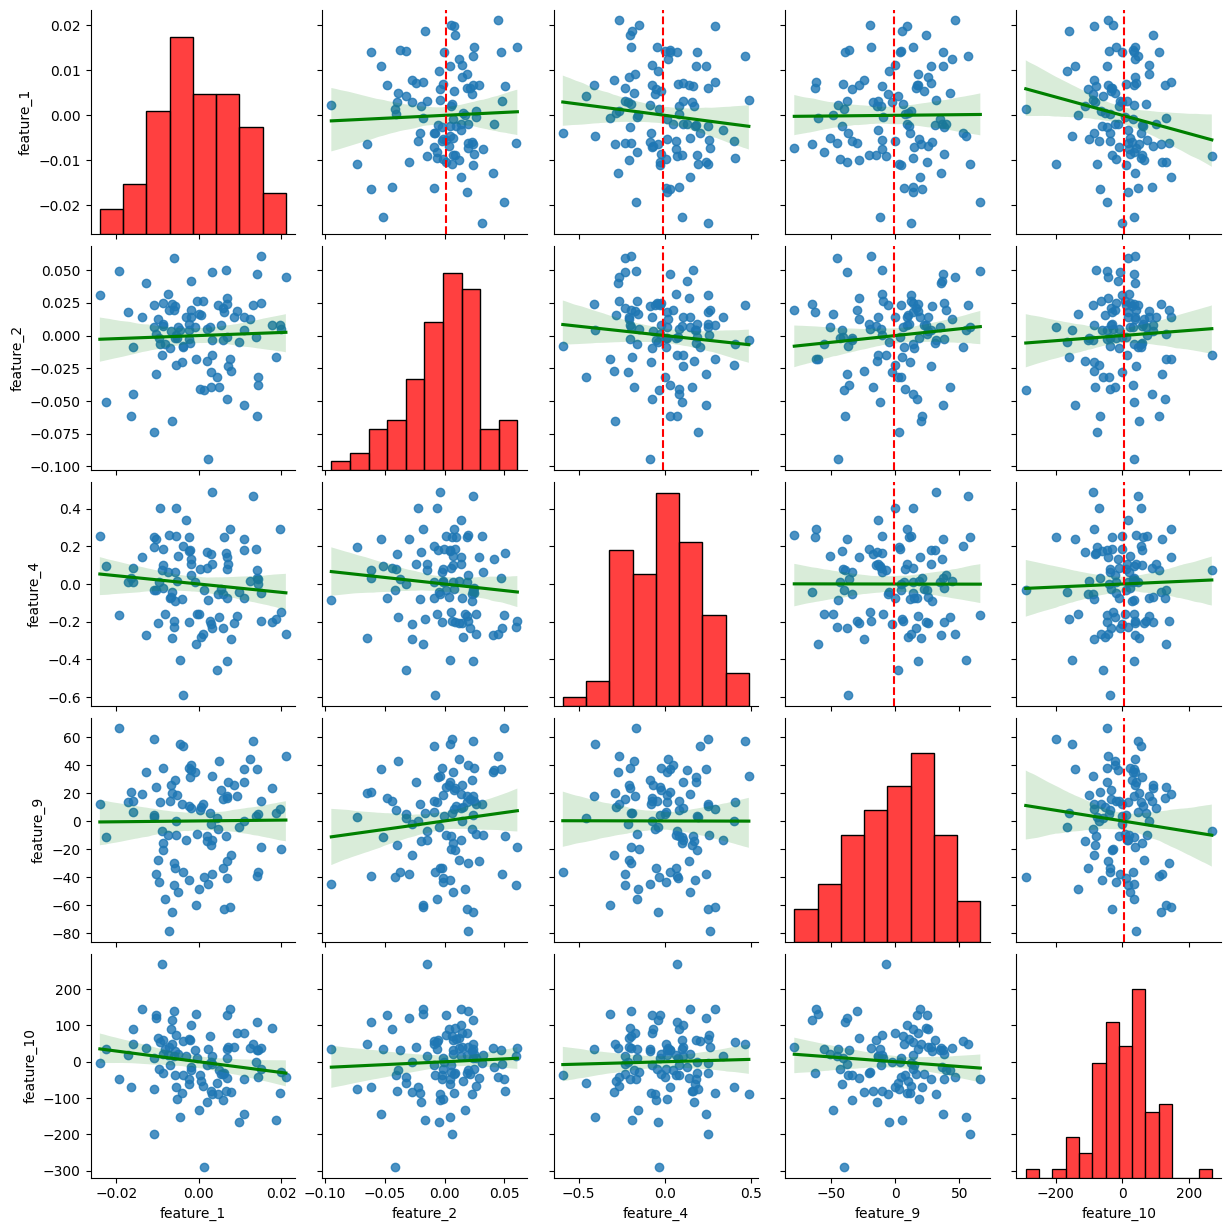

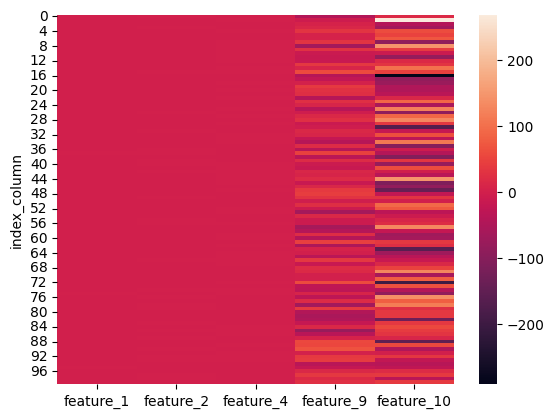

            feature_1  feature_2  feature_4  feature_9  feature_10
feature_1    1.000000   0.039082  -0.104988   0.009299   -0.172656
feature_2    0.039082   1.000000  -0.099678   0.111033    0.055512
feature_4   -0.104988  -0.099678   1.000000  -0.001696    0.032361
feature_9    0.009299   0.111033  -0.001696   1.000000   -0.099563
feature_10  -0.172656   0.055512   0.032361  -0.099563    1.000000


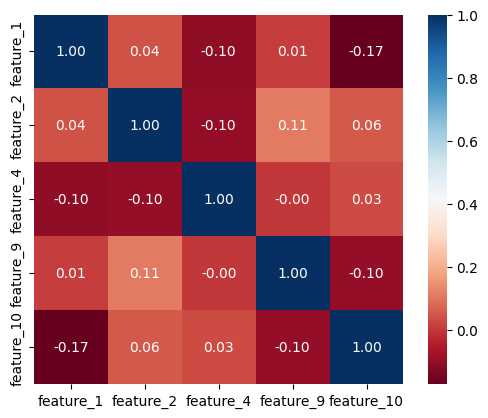

In [238]:
"""
    Returns:
        Covariance matrix (n_features, n_features)
        
    Notes:
        Centering is crucial for covariance estimation because:
        1. Removes mean offset that would bias correlation estimates
        2. Makes results interpretable as variance around the mean
        3. Ensures positive semidefinite property of result
    """
    # TODO: Implement covariance estimation
    # Hints:
    # - Review Lesson 10 for covariance matrix definition
    # - Look up numpy's mean() function parameters
    # - Think about matrix multiplication with transpose
    # - Consider how to verify your result is symmetric

def rand_cols(features, min_value, max_value):
    if max_value - min_value + 1 < features:
        raise ValueError('The number of features exceeds the range of values')
    return random.sample(range(min_value, max_value + 1), features)

def random_rows(length, min_value, max_value):
    if max_value - min_value + 1 < length:
        raise ValueError('The number of rows exceeds the range of values')
    return random.sample(range(min_value, max_value + 1), length)

def get_equally_spaced_index(csv_path, num_indices):
    """
    Finds the upper and lower bounds of the index in a CSV file,
    and returns an equally spaced index with a specified number of points.

    Args:
        csv_path (str): The path to the CSV file.
        num_indices (int): The number of equally spaced indices to return.

    Returns:
        numpy.ndarray: An array of equally spaced indices.
    """
    df = pd.read_csv(csv_path)

    lower_bound = df.index.min()
    upper_bound = df.index.max()

    return np.linspace(lower_bound, upper_bound, num_indices)

def calc_cov_matrix(matrix):
    """
    Calculates the covariance matrix of a given matrix.

    Args:
        matrix (numpy.ndarray): A 2D numpy array representing the data matrix,
                                where rows are variables and columns are observations.

    Returns:
        numpy.ndarray: The covariance matrix of the input matrix.
    """
    # Calculate the mean of each row (variable)
    mean_rows = np.mean(matrix, axis=0, keepdims=True)

    # Center the data by subtracting the mean of each row
    centered_data = matrix - mean_rows

    # Calculate the covariance matrix
    n_observations = matrix.shape[1]
    covariance_matrix = (centered_data @ centered_data.T) / (n_observations - 1)

    return covariance_matrix

# Generate random list of integers for selecting columns (sample size)
n_features = 5
min_feature = 0
max_feature = 9

# Generate random list of integers for selecting rows (sample size)
n_samples = 100
minimum_value = 0
maximum_value = 999

select_col = rand_cols(n_features, min_feature, max_feature)
sort_col = sorted(select_col)
sensor_df = pd.read_csv(filename, usecols=sort_col)
mean_data = sensor_df.mean()
max_values = sensor_df.max().max()
min_values = sensor_df.min().min()

#sns.heatmap(sensor_df_heatmap)
print(f'The maximum values for each column are:\n{max_values} \nThe minimum values for each column are:\n{min_values}')

#row_index = np_array[random_integer_list] #Select random rows

#Use the code below to calculate the covariance and create matrix
#centered_data = sensor_df - mean_data

#print(mean_data[sort_col[9]])
""" 
for i in range(len(sort_col)):
    for j in range(len(sensor_df)):
        #print(f"Column {sensor_df.columns[i]} row {j} is {sensor_df[sensor_df.columns[i]][j]}. Centered value is {sensor_df[sensor_df.columns[i]][j] - mean_data[sort_col[i]]}")
        center_df = sensor_df[sensor_df.columns[i]][j] - mean_data[sort_col[i]]
        #print(f"Column {sensor_df.columns[i]} row {j} is {sensor_df[sensor_df.columns[i]][j]}. Centered value is {center_df}")
"""

# Generate random list of integers
random_integer_list = random_rows(n_samples, minimum_value, maximum_value) 
row_sorted = sorted(random_integer_list)
        
selected_rows = sensor_df.iloc[row_sorted]

#Create a new dataframe with the selected rows
s_df = pd.DataFrame(selected_rows)
#Save the sample dataframe to a csv file
s_df.to_csv('datasets/sample_data.csv', index=False)

#Read from new sample CSV file
s_filename = 'datasets/sample_data.csv'
sample_df = pd.read_csv(s_filename)

sample_mean = sample_df.select_dtypes(include='number').mean()
df_centered = sample_df.select_dtypes(include='number') - sample_mean
""" 
# Using .to_numpy() to create matrix
matrix_numpy = sample_df.to_numpy()
print("Matrix using .to_numpy():\n", matrix_numpy)
print("Type:", type(matrix_numpy))

covariance_matrix = calc_cov_matrix(matrix_numpy)
print("The Covariance Matrix: \n", covariance_matrix)

#cov_matrix = centered_data.cov()
print("The covariance matrix of the selected sensor values is:\n", df_centered.cov())

#The correlation matrix is calculated using the corr() function
print("The correlation matrix of the selected sensor values is:\n", df_centered.corr())
"""
#pairplot = sns.pairplot(df_centered, kind='reg', diag_kws={'color':'red'}, plot_kws={'line_kws':{'color':'green'}}) 
pairplot = sns.pairplot(df_centered, kind='reg', diag_kws={'color':'red'}, plot_kws={'line_kws':{'color':'green'}})
        
for i, j in zip(*np.triu_indices_from(pairplot.axes, 1)):
    ax_centered = pairplot.axes[i, j]
    # Add vertical line at mean of x-axis
    ax_centered.axvline(mean_data[j], color='r', linestyle='--')
    # Add horizontal line at mean of y-axis 
    #ax_centered.axhline(means_centered[i], color='r', linestyle='--')
plt.show(pairplot)


df_centered['index_column'] = range(len(df_centered))
sensor_df_heatmap = df_centered.set_index('index_column') # Set the new index as the index
heatmap = sns.heatmap(sensor_df_heatmap)
plt.show(heatmap)

df_centered_corr = df_centered.corr()
data_to_plot = df_centered_corr.iloc[:-1, :-1]
print(data_to_plot)
heatmap_corr = sns.heatmap(data_to_plot, cmap='RdBu', annot=True, square=True, fmt=".2f")
plt.show(heatmap_corr)



#### Estimator Comparison

This function validates your implementation against numpy's trusted version:

- Compare your results with numpy.cov()
- Check for numerical differences
- Understand any discrepancies
- Good software engineering practice: test against known good implementation
- It's ok if they are not exactly the same, but they should be close

In [ ]:
def compare_estimators(X: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Compare your estimator to numpy's implementation
    
    Args:
        X: Data matrix
        
    Returns:
        Your covariance matrix, numpy's covariance matrix
    """
    # TODO: Compare your implementation to np.cov()
    
    

#### Sample Size Analysis

This function explores how many samples we need for reliable estimates:

- Try different sample sizes (small to large)
- Sampling means to draw samples from the dataset and compute only on the smaller sample
- See how estimates stabilize
- Important for real applications where data is limited
- Helps understand estimation uncertainty
- Advanced (repeatedly sample at the same sample size)

In [ ]:
def analyze_sample_size(X: np.ndarray,
                       sizes: Optional[np.ndarray] = None) -> dict:
    """
    Analyze how covariance estimate changes with sample size

    Args:
        X: Full dataset
        sizes: Array of sample sizes to test
        
    Returns:
        Dictionary with results
    """
    if sizes is None:
        sizes = np.logspace(1, np.log10(len(X)), 20).astype(int)
    
    # TODO: For each size n:
    # 1. Sample n points randomly
    # 2. Compute covariance
    # 3. Track how estimate changes

### 2. Analysis (40%)

#### Sample Size Effects

- Plot how covariance estimates converge as n increases
    - Hint: Plot Frobenius norm of difference between successive estimates
        - Frobenius norm is the sum of the squares of the elements of the matrix
        - You can use np.linalg.norm(A, ord='fro') to compute the Frobenius norm
    - Try logarithmic spacing of sample sizes
    - Look for where the curve flattens out
- Identify minimum sample size needed for stable estimates
    - Look for where changes between successive estimates become small
    - Consider setting a threshold (e.g., < 1% change)
    - Think about your application's accuracy needs
- Compare your results with numpy's implementation
    - Use np.allclose() with reasonable tolerance
    - Remember: Small numerical differences are normal
    - Focus on pattern similarity rather than exact matches

#### Visualization and Interpretation

- Create covariance heatmaps
- Plot confidence ellipses
- Interpret the meaning of:
    - Diagonal elements
    - Off-diagonal elements
    - Positive vs negative covariance

#### Understanding Data Preprocessing

- Centering Analysis:
    - Compare covariance with/without centering
    - Visualize how centering affects the data cloud
    - Prove mathematically why centering is necessary (optional)
- Basic Scaling Introduction:
    - Scaling means to divide each variable (column) by its standard deviation
    - Compare raw vs standardized variables
    - Show when different scales cause problems

In [144]:
#Show the variables in the current environment
#%whos DataFrame
# Load the CSV file into a pandas DataFrame
df = pd.read_csv(filename)

# Convert the DataFrame to a NumPy matrix
matrix = df.to_numpy()

# If you have headers in the CSV and want to exclude them from the matrix:
matrix_no_headers = df.iloc[:, :].values

print("Matrix with headers (if any):\n", matrix)
print("\nMatrix without headers:\n", matrix_no_headers)

Matrix with headers (if any):
 [[ 4.96714153e-03 -3.84728631e-03  5.01481713e-02 ...  9.91180067e+00
  -1.68720346e+01  5.42560044e+01]
 [-4.63417693e-03 -1.29592070e-02  1.87342599e-02 ...  4.05866037e+00
  -3.26326933e+01 -1.41230370e+02]
 [ 1.46564877e-02 -6.28235968e-03  5.22846364e-03 ...  4.85232650e+00
  -2.15858353e+01 -2.91693750e+01]
 ...
 [-9.12588198e-03  1.95165904e-02  6.54464416e-02 ... -1.16358437e+01
  -3.63940321e+01 -1.75995888e+02]
 [-4.45795314e-03 -1.40163732e-02  4.07214135e-02 ... -2.29376928e+01
  -3.52533975e+01 -7.70813631e+01]
 [ 1.43362502e-02  5.32722990e-03  5.12693218e-02 ... -9.10951579e+00
   1.78168909e+01  6.44388454e+01]]

Matrix without headers:
 [[ 4.96714153e-03 -3.84728631e-03  5.01481713e-02 ...  9.91180067e+00
  -1.68720346e+01  5.42560044e+01]
 [-4.63417693e-03 -1.29592070e-02  1.87342599e-02 ...  4.05866037e+00
  -3.26326933e+01 -1.41230370e+02]
 [ 1.46564877e-02 -6.28235968e-03  5.22846364e-03 ...  4.85232650e+00
  -2.15858353e+01 -2.916937

## Optional Advanced Topics

### Population vs Sample Statistics

- Research the difference between population and sample statistics
- Investigate why numpy.cov() uses (n-1) denominator by default
- Compare with scipy.stats covariance functions
- Experiment with different denominators (n vs n-1)
- Consider when each might be appropriate

Example exploration:

In [228]:
# Compare different covariance implementations

# Your implementation
cov_yours = estimate_covariance(df_centered)

# NumPy implementation (uses n-1)
cov_numpy = np.cov(df_centered.T)

# Manual calculation with n denominator
X_centered = df_centered - df_centered.mean(axis=0)
cov_pop = (X_centered.T @ X_centered) / len(df_centered)

# Compare results and consider:
# - When do the differences matter?
# - Why might we prefer one over another?
# - What assumptions are we making?

NameError: name 'estimate_covariance' is not defined


### Used Formulas
**Mean**
\begin{equation} 
\bar{x} = \frac{\sum_x}{n} \tag 1
\end{equation}
**Variance**
\begin{equation} 
s^2_{x} = \frac{\sum (x_i - \bar{x})^2}{n-1} \tag 2
\end{equation}
**Standard Deviation**
\begin{equation} 
s_{x} = \sqrt{\frac{\sum (x_i - \bar{x})^2}{n-1}} \tag 3
\end{equation}
**Covariance**
\begin{equation} 
s_{xy} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{n-1} \tag4
\end{equation}
**Correlation**
\begin{equation} 
r = \frac{s_{xy}} {s_x s_y} \frac{(Covariance)} {(Standard Deviation)}\tag 5
\end{equation}
Note: If equation below is true then a relationship exists.
\begin{equation}
|r| \ge \frac{2}{\sqrt{n}}
\end{equation}
**SVD Equation**
\begin{equation} 
A = U \sum V^T \tag 4
\end{equation}
